### Importing necessary libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [133]:
warnings.filterwarnings('ignore') # Ignore warning
plt.style.use('dark_background') # Dark background for plot

Read CSV file

In [134]:
data = pd.read_csv('Datasets/exercises.csv')

First 5 data of dataset

In [135]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles/0,secondaryMuscles/1,instructions/0,instructions/1,...,instructions/5,secondaryMuscles/2,instructions/6,instructions/7,secondaryMuscles/3,instructions/8,secondaryMuscles/4,instructions/9,secondaryMuscles/5,instructions/10
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,hip flexors,lower back,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,NaN,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,NaN,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,hamstrings,glutes,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,NaN,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
data.shape

(1324, 23)

### Check for null values in dataset

In [137]:
data.isnull()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles/0,secondaryMuscles/1,instructions/0,instructions/1,...,instructions/5,secondaryMuscles/2,instructions/6,instructions/7,secondaryMuscles/3,instructions/8,secondaryMuscles/4,instructions/9,secondaryMuscles/5,instructions/10
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1320,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,True,True
1321,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
1322,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


### Total of null values


In [138]:
data.isnull().sum()

bodyPart                 0
equipment                0
gifUrl                   0
id                       0
name                     0
target                   0
secondaryMuscles/0       0
secondaryMuscles/1     338
instructions/0           0
instructions/1           0
instructions/2           0
instructions/3           0
instructions/4          82
instructions/5         585
secondaryMuscles/2    1091
instructions/6        1011
instructions/7        1232
secondaryMuscles/3    1292
instructions/8        1304
secondaryMuscles/4    1320
instructions/9        1319
secondaryMuscles/5    1322
instructions/10       1321
dtype: int64

### Info of dataset

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bodyPart            1324 non-null   object
 1   equipment           1324 non-null   object
 2   gifUrl              1324 non-null   object
 3   id                  1324 non-null   int64 
 4   name                1324 non-null   object
 5   target              1324 non-null   object
 6   secondaryMuscles/0  1324 non-null   object
 7   secondaryMuscles/1  986 non-null    object
 8   instructions/0      1324 non-null   object
 9   instructions/1      1324 non-null   object
 10  instructions/2      1324 non-null   object
 11  instructions/3      1324 non-null   object
 12  instructions/4      1242 non-null   object
 13  instructions/5      739 non-null    object
 14  secondaryMuscles/2  233 non-null    object
 15  instructions/6      313 non-null    object
 16  instructions/7      92 n

### Heatmap for null values in columns

<Axes: >

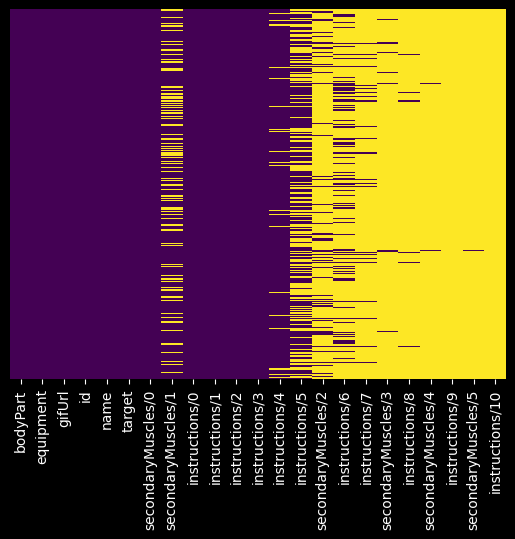

In [140]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Join secondaryMuscle columns into one column

In [141]:
selected_columns = ['secondaryMuscles/0', 'secondaryMuscles/1', 'secondaryMuscles/2', 'secondaryMuscles/3', 'secondaryMuscles/4', 'secondaryMuscles/5']

data['secondaryMuscles'] = data[selected_columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

### Drop unnecessary secondaryMuscle columns

In [142]:
data.drop(columns=selected_columns, inplace=True)

In [143]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,instructions/0,instructions/1,instructions/2,instructions/3,instructions/4,instructions/5,instructions/6,instructions/7,instructions/8,instructions/9,instructions/10,secondaryMuscles
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,"Engaging your abs, slowly lift your upper body...","Pause for a moment at the top, then slowly low...",Repeat for the desired number of repetitions.,NaN,NaN,NaN,NaN,NaN,NaN,"hip flexors, lower back"
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,"Pause for a moment at the bottom, then slowly ...",Repeat on the other side.,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,Bring your right elbow towards your left knee ...,Return to the starting position and repeat the...,Continue alternating sides in a pedaling motio...,NaN,NaN,NaN,NaN,NaN,NaN,hip flexors
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...","Slowly lower your hips towards the ground, fee...",Hold this position for 20-30 seconds.,Switch legs and repeat the stretch on the othe...,NaN,NaN,NaN,NaN,NaN,NaN,"hamstrings, glutes"
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...","Engaging your abs, lift your shoulders off the...",Return to the starting position and repeat on ...,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques


### Heatmap after secondaryMuscles cleaning

<Axes: >

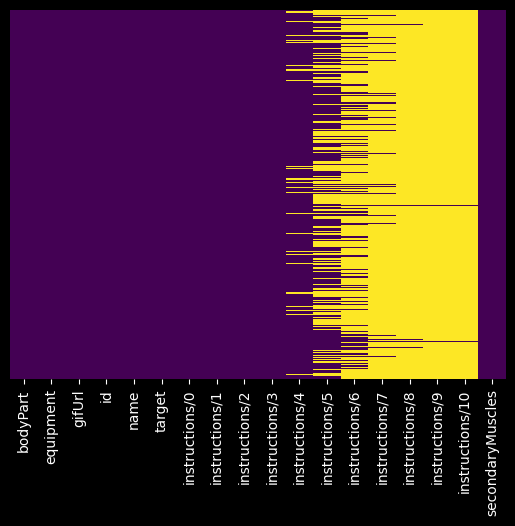

In [144]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Join instructions columns into one column

In [145]:
selected_columns = ['instructions/0', 'instructions/1', 'instructions/2', 'instructions/3', 'instructions/4', 'instructions/5', 'instructions/6', 'instructions/7', 'instructions/8', 'instructions/9', 'instructions/10']

data['instructions'] = data[selected_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [146]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,instructions/0,instructions/1,instructions/2,instructions/3,instructions/4,instructions/5,instructions/6,instructions/7,instructions/8,instructions/9,instructions/10,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,"Engaging your abs, slowly lift your upper body...","Pause for a moment at the top, then slowly low...",Repeat for the desired number of repetitions.,NaN,NaN,NaN,NaN,NaN,NaN,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,"Pause for a moment at the bottom, then slowly ...",Repeat on the other side.,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,Bring your right elbow towards your left knee ...,Return to the starting position and repeat the...,Continue alternating sides in a pedaling motio...,NaN,NaN,NaN,NaN,NaN,NaN,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...","Slowly lower your hips towards the ground, fee...",Hold this position for 20-30 seconds.,Switch legs and repeat the stretch on the othe...,NaN,NaN,NaN,NaN,NaN,NaN,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...","Engaging your abs, lift your shoulders off the...",Return to the starting position and repeat on ...,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques,Lie flat on your back with your knees bent and...


### Drop unnecessary instructions columns

In [147]:
data.drop(columns=selected_columns, inplace=True)

### Final dataset after cleaning

In [148]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


<Axes: >

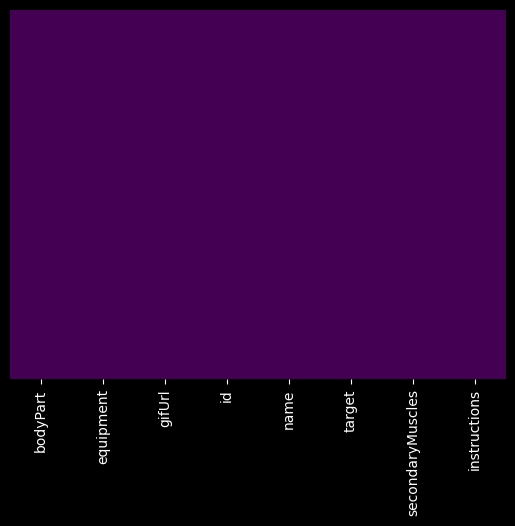

In [149]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [150]:
data.isnull().sum()

bodyPart            0
equipment           0
gifUrl              0
id                  0
name                0
target              0
secondaryMuscles    0
instructions        0
dtype: int64

In [151]:
data.drop(columns='id', inplace=True)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bodyPart          1324 non-null   object
 1   equipment         1324 non-null   object
 2   gifUrl            1324 non-null   object
 3   name              1324 non-null   object
 4   target            1324 non-null   object
 5   secondaryMuscles  1324 non-null   object
 6   instructions      1324 non-null   object
dtypes: object(7)
memory usage: 72.5+ KB


In [153]:
data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


### Plot for bodyPart column

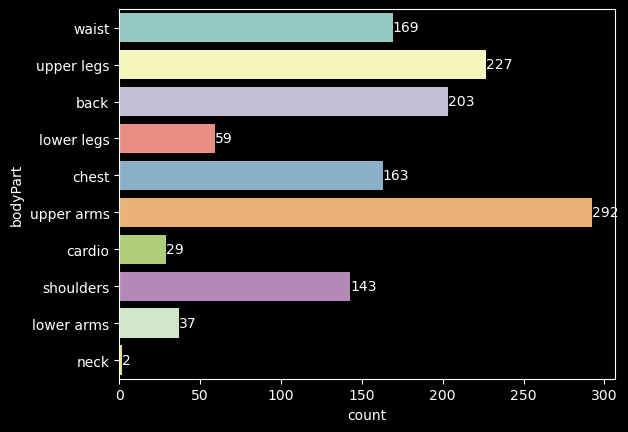

In [154]:
ax = sns.countplot(data=data,y='bodyPart')
ax.bar_label(ax.containers[0])
plt.show()

### Plot for equipment column

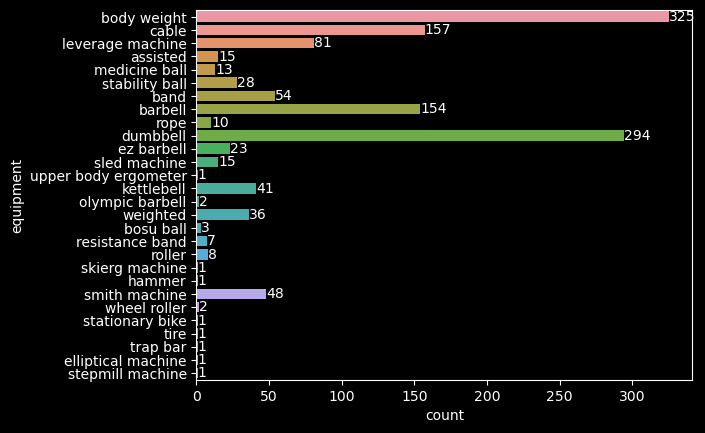

In [155]:
ax = sns.countplot(data=data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

### Plot for target column

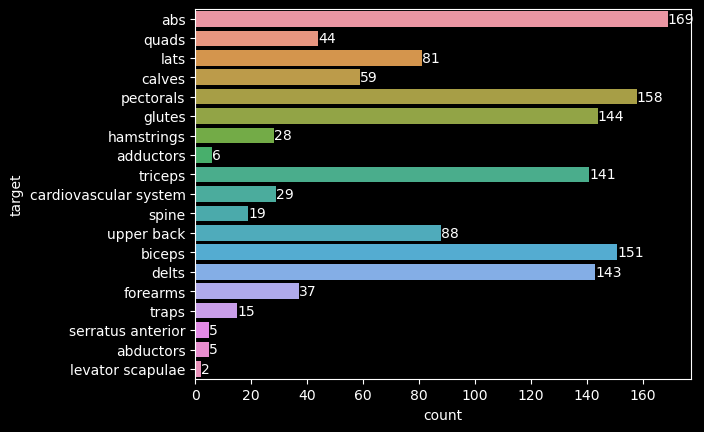

In [156]:
ax = sns.countplot(data=data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'waist' data distribution in the dataset 

In [157]:
waist_data = data[data['bodyPart'] == 'waist']
waist_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...
9,waist,body weight,https://v2.exercisedb.io/image/osybi41Me6RFK2,arm slingers hanging bent knee legs,abs,"shoulders, back",Hang from a pull-up bar with your arms fully e...


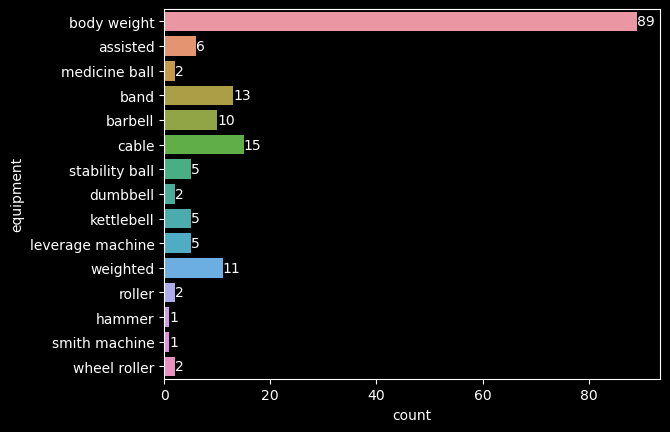

In [158]:
ax = sns.countplot(data=waist_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

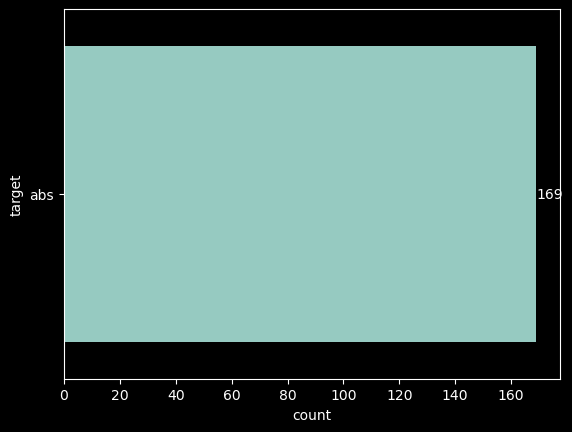

In [159]:
ax = sns.countplot(data=waist_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'upper legs' data distribution in the dataset 

In [160]:
upper_legs_data = data[data['bodyPart'] == 'upper legs']
upper_legs_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
11,upper legs,body weight,https://v2.exercisedb.io/image/sGs-MoFgyniLX4,arms apart circular toe touch (male),glutes,"hamstrings, quadriceps, calves",Stand with your feet shoulder-width apart and ...
17,upper legs,assisted,https://v2.exercisedb.io/image/pIPCvG-7PYwJyb,assisted lying glutes stretch,glutes,hamstrings,Lie on your back with your legs extended. Bend...
18,upper legs,assisted,https://v2.exercisedb.io/image/re-rcIyamJTP9k,assisted lying gluteus and piriformis stretch,glutes,hamstrings,Lie on your back with your legs extended. Bend...
23,upper legs,assisted,https://v2.exercisedb.io/image/ytpSbFtNhvVICC,assisted prone hamstring,hamstrings,"glutes, lower back",Lie face down on a mat or bench with your legs...


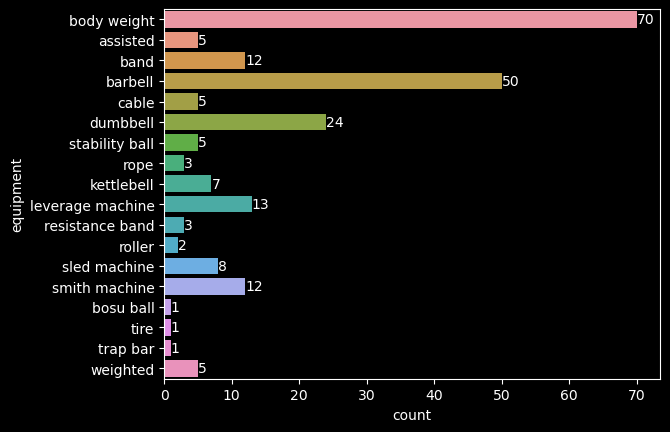

In [161]:
ax = sns.countplot(data=upper_legs_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

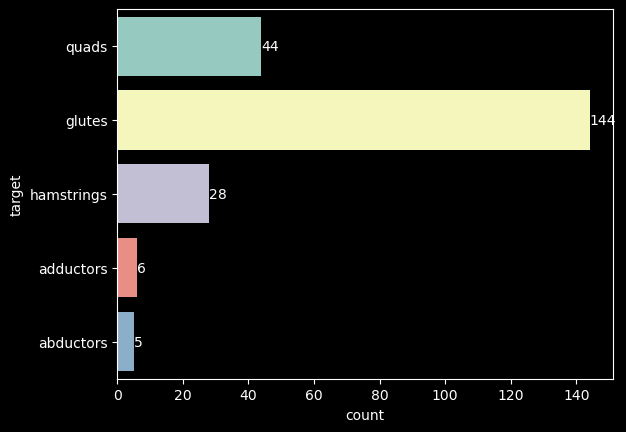

In [162]:
ax = sns.countplot(data=upper_legs_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'back' data distribution in the dataset 

In [163]:
back_data = data[data['bodyPart'] == 'back']
back_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
5,back,cable,https://v2.exercisedb.io/image/Az5UYVYNa4j-oS,alternate lateral pulldown,lats,"biceps, rhomboids",Sit on the cable machine with your back straig...
7,back,body weight,https://v2.exercisedb.io/image/LSBkdKcbK4xj8n,archer pull up,lats,"biceps, forearms",Start by hanging from a pull-up bar with an ov...
22,back,leverage machine,https://v2.exercisedb.io/image/dV2Lj3p2pfkt4c,assisted parallel close grip pull-up,lats,"biceps, forearms",Adjust the machine to your desired weight and ...
26,back,leverage machine,https://v2.exercisedb.io/image/rFSbsEA3x-wTKy,assisted pull-up,lats,"biceps, forearms",Adjust the machine to your desired weight and ...
30,back,leverage machine,https://v2.exercisedb.io/image/iD6I6vHUV4flxZ,assisted standing chin-up,lats,"biceps, forearms",Adjust the machine to your desired assistance ...


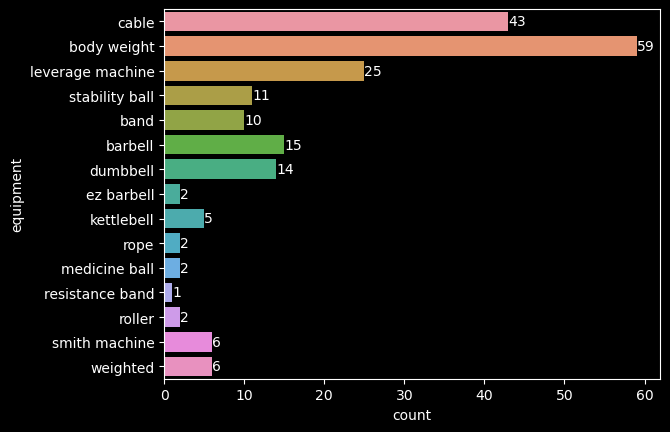

In [164]:
ax = sns.countplot(data=back_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

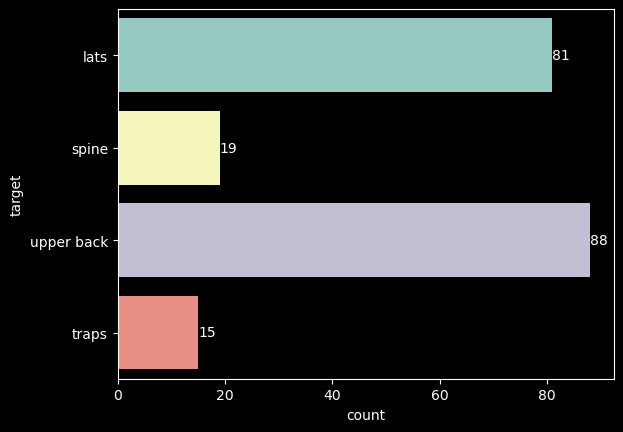

In [165]:
ax = sns.countplot(data=back_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'lower legs' data distribution in the dataset 

In [166]:
lower_legs_data = data[data['bodyPart'] == 'lower legs']
lower_legs_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
6,lower legs,body weight,https://v2.exercisedb.io/image/ivmTcSJsMlXJeK,ankle circles,calves,ankle stabilizers,Sit on the ground with your legs extended in f...
16,lower legs,assisted,https://v2.exercisedb.io/image/FHWElls92kFz7u,assisted lying calves stretch,calves,hamstrings,Lie on your back with your legs extended. Bend...
77,lower legs,band,https://v2.exercisedb.io/image/tgDhZRp45npWII,band single leg calf raise,calves,"ankles, feet",Stand with your feet hip-width apart and place...
78,lower legs,band,https://v2.exercisedb.io/image/r1buBLtWssfNHS,band single leg reverse calf raise,calves,"hamstrings, glutes",Stand with your feet hip-width apart and place...
90,lower legs,band,https://v2.exercisedb.io/image/TrXQWKtgFRJuDh,band two legs calf raise - (band under both le...,calves,"ankles, feet",Stand with your feet shoulder-width apart and ...


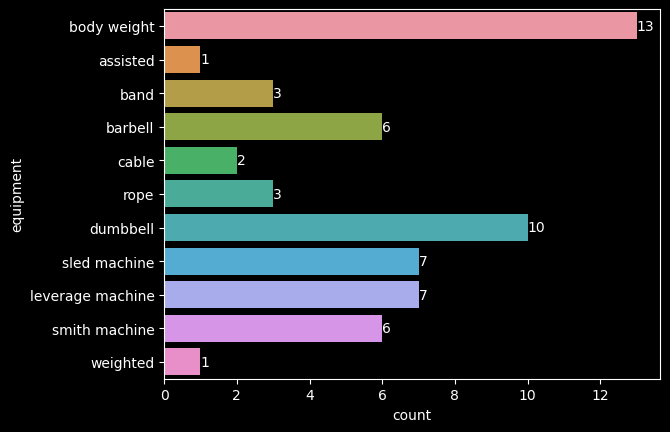

In [167]:
ax = sns.countplot(data=lower_legs_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

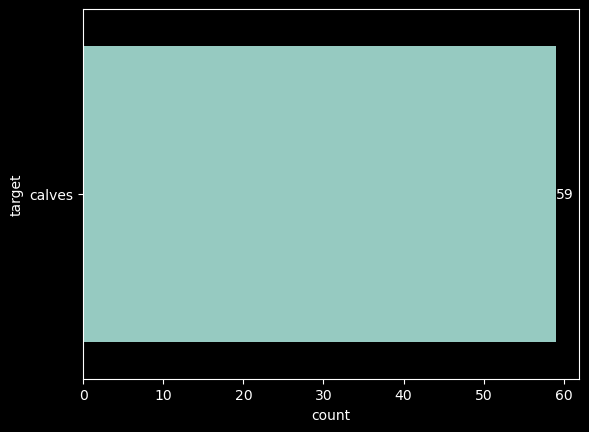

In [168]:
ax = sns.countplot(data=lower_legs_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'back' data distribution in the dataset 

In [169]:
chest_data = data[data['bodyPart'] == 'chest']
chest_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
8,chest,body weight,https://v2.exercisedb.io/image/GSjHZGSiL1VbQ7,archer push up,pectorals,"triceps, shoulders, core",Start in a push-up position with your hands sl...
13,chest,leverage machine,https://v2.exercisedb.io/image/AbxK1fjW5YdIBj,assisted chest dip (kneeling),pectorals,"triceps, shoulders",Adjust the machine to your desired height and ...
27,chest,assisted,https://v2.exercisedb.io/image/V4PlYYE0rlK7tY,assisted seated pectoralis major stretch with ...,pectorals,"shoulders, triceps",Sit on a stability ball with your feet flat on...
34,chest,leverage machine,https://v2.exercisedb.io/image/9RWiaQoGBGogXv,assisted wide-grip chest dip (kneeling),pectorals,"triceps, shoulders",Adjust the machine to your desired height and ...
46,chest,band,https://v2.exercisedb.io/image/oyWqo0D8zSMbyD,band bench press,pectorals,"triceps, shoulders",Lie flat on a bench with your feet flat on the...


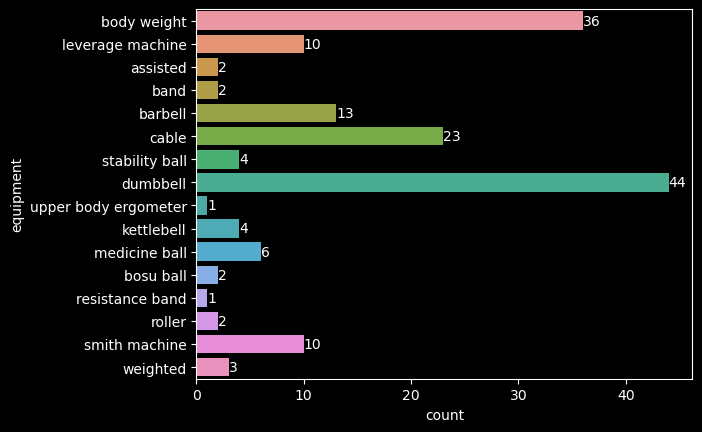

In [170]:
ax = sns.countplot(data=chest_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

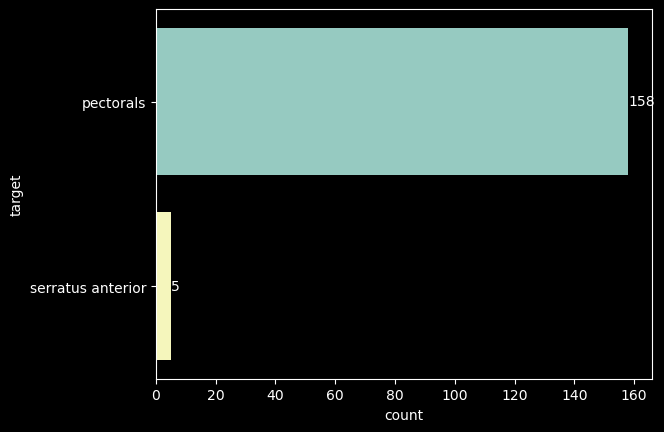

In [171]:
ax = sns.countplot(data=chest_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'upper arms' data distribution in the dataset 

In [172]:
upper_arms_data = data[data['bodyPart'] == 'upper arms']
upper_arms_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
32,upper arms,assisted,https://v2.exercisedb.io/image/qnqFpisTx9R-gB,assisted standing triceps extension (with towel),triceps,shoulders,Stand with your feet shoulder-width apart and ...
33,upper arms,leverage machine,https://v2.exercisedb.io/image/Wr9I3UD5-miI3Y,assisted triceps dip (kneeling),triceps,"chest, shoulders",Adjust the machine to your desired weight and ...
42,upper arms,band,https://v2.exercisedb.io/image/y5DNwJsa0ZCGV3,band alternating biceps curl,biceps,forearms,Stand with your feet shoulder-width apart and ...
50,upper arms,band,https://v2.exercisedb.io/image/bepXYwVrQpSP7W,band close-grip push-up,triceps,"chest, shoulders","Place a band around your upper arms, just abov..."
51,upper arms,band,https://v2.exercisedb.io/image/-FDJYdjMlHuHvl,band concentration curl,biceps,forearms,Sit on a bench or chair with your legs spread ...


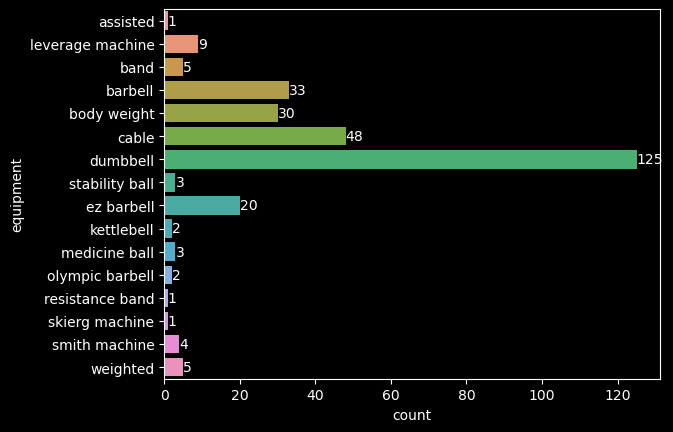

In [173]:
ax = sns.countplot(data=upper_arms_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

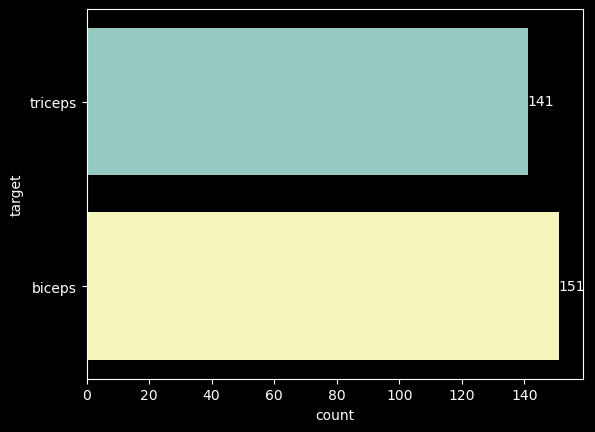

In [174]:
ax = sns.countplot(data=upper_arms_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'cardio' data distribution in the dataset 

In [175]:
cardio_data = data[data['bodyPart'] == 'cardio']
cardio_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
35,cardio,body weight,https://v2.exercisedb.io/image/GzvxMK5EkJ6H43,astride jumps (male),cardiovascular system,"quadriceps, hamstrings, calves",Stand with your feet shoulder-width apart. Ben...
36,cardio,body weight,https://v2.exercisedb.io/image/akGmnMj1gqgJU3,back and forth step,cardiovascular system,"quadriceps, hamstrings, glutes, calves",Stand with your feet shoulder-width apart. Ste...
239,cardio,body weight,https://v2.exercisedb.io/image/CU7ulGA569adpS,bear crawl,cardiovascular system,"core, shoulders, triceps",Start on all fours with your hands directly un...
266,cardio,body weight,https://v2.exercisedb.io/image/Ouk-Qv9vZOZdwd,burpee,cardiovascular system,"quadriceps, hamstrings, calves, shoulders, chest",Start in a standing position with your feet sh...
453,cardio,leverage machine,https://v2.exercisedb.io/image/eqnA9tzuKcNB5k,cycle cross trainer,cardiovascular system,"quadriceps, hamstrings, glutes",Adjust the seat height and position yourself o...


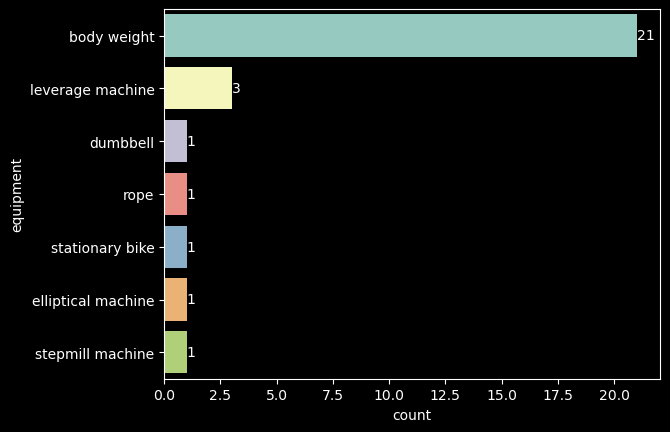

In [176]:
ax = sns.countplot(data=cardio_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

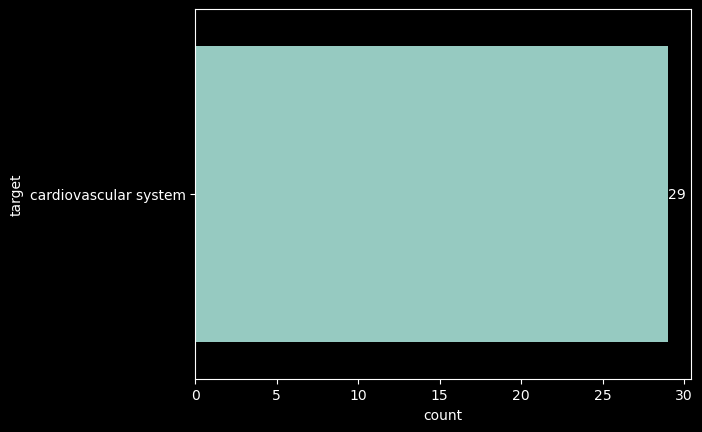

In [177]:
ax = sns.countplot(data=cardio_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'shoulders' data distribution in the dataset 

In [178]:
shoulders_data = data[data['bodyPart'] == 'shoulders']
shoulders_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
54,shoulders,band,https://v2.exercisedb.io/image/Lnwg2eVOyiGGH1,band front lateral raise,delts,"traps, upper back",Stand with your feet shoulder-width apart and ...
55,shoulders,band,https://v2.exercisedb.io/image/jbfxRRc0JKrcCT,band front raise,delts,"triceps, upper back",Stand with your feet shoulder-width apart and ...
70,shoulders,band,https://v2.exercisedb.io/image/1Tsu9UbqOeYcwr,band reverse fly,delts,"upper back, trapezius",Attach the band to a stationary object at ches...
74,shoulders,band,https://v2.exercisedb.io/image/t9gbH8wqasEmb0,band shoulder press,delts,"triceps, upper back",Stand with your feet shoulder-width apart and ...
83,shoulders,band,https://v2.exercisedb.io/image/o1qy67cXNqa0S-,band standing rear delt row,delts,"trapezius, rhomboids, biceps",Stand with your feet shoulder-width apart and ...


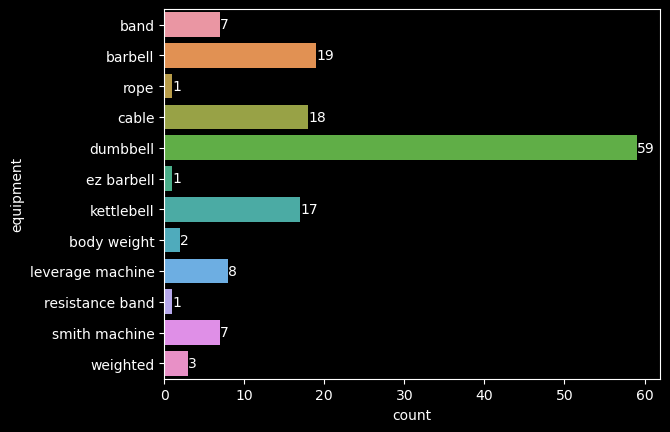

In [179]:
ax = sns.countplot(data=shoulders_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

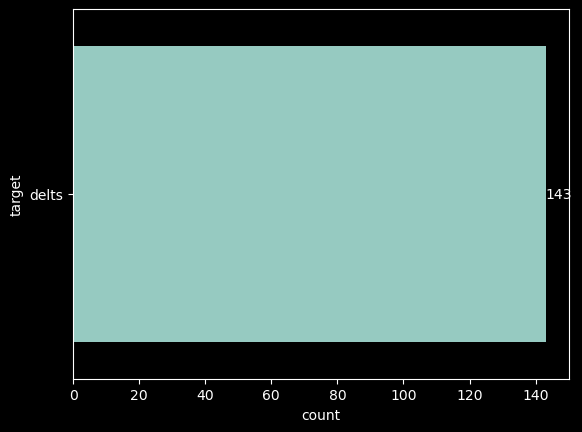

In [180]:
ax = sns.countplot(data=shoulders_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'lower arms' data distribution in the dataset 

In [181]:
lower_arms_data = data[data['bodyPart'] == 'lower arms']
lower_arms_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
71,lower arms,band,https://v2.exercisedb.io/image/sP6B0BzyAwnsyC,band reverse wrist curl,forearms,forearms,Sit on a bench or chair with your feet flat on...
94,lower arms,band,https://v2.exercisedb.io/image/RQUBteDgupiwgl,band wrist curl,forearms,"biceps, triceps",Sit on a bench or chair with your feet flat on...
156,lower arms,barbell,https://v2.exercisedb.io/image/t0FbvEEv0O7zgQ,barbell palms down wrist curl over a bench,forearms,"biceps, brachialis",Sit on a bench with your feet flat on the grou...
157,lower arms,barbell,https://v2.exercisedb.io/image/MASH24WRX3M7PG,barbell palms up wrist curl over a bench,forearms,"biceps, shoulders",Sit on a bench with your feet flat on the grou...
170,lower arms,barbell,https://v2.exercisedb.io/image/E2MZVcCDUbHMN9,barbell revers wrist curl v. 2,forearms,"biceps, brachialis",Sit on a bench with your feet flat on the grou...


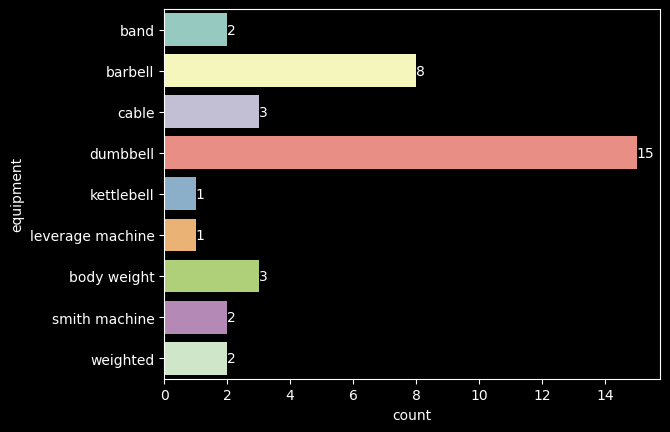

In [182]:
ax = sns.countplot(data=lower_arms_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

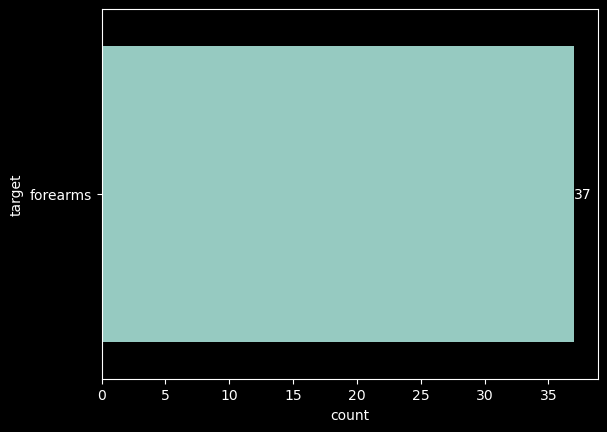

In [183]:
ax = sns.countplot(data=lower_arms_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

### Filter bodyPart 'neck' data distribution in the dataset 

In [184]:
neck_data = data[data['bodyPart'] == 'neck']
neck_data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
1027,neck,body weight,https://v2.exercisedb.io/image/SYJVmmiYxfzdlI,neck side stretch,levator scapulae,"trapezius, sternocleidomastoid",Stand or sit up straight with your shoulders r...
1139,neck,body weight,https://v2.exercisedb.io/image/SL03AL7XKM6M0L,side push neck stretch,levator scapulae,"trapezius, sternocleidomastoid",Stand or sit up straight with your shoulders r...


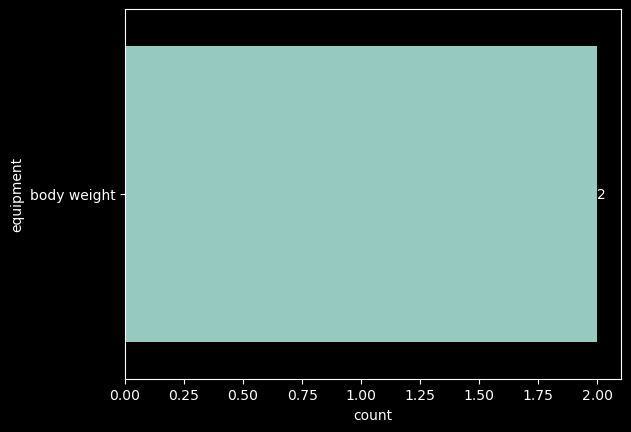

In [185]:
ax = sns.countplot(data=neck_data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

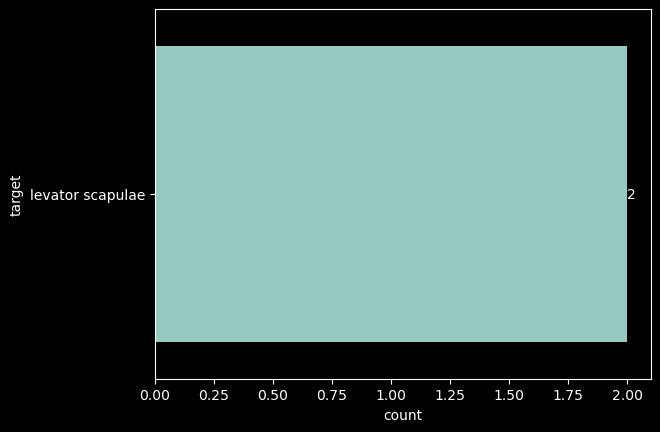

In [186]:
ax = sns.countplot(data=neck_data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

In [187]:
data.head()

,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


### Load another dataset with exercise levels

In [188]:
dt = pd.read_csv('Datasets/megaGymDataset.csv')

In [189]:
dt.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


### Drop unnecessary columns

In [190]:
dt = dt[['Title', 'Level']]

In [191]:
dt.head()

,Title,Level
0,Partner plank band row,Intermediate
1,Banded crunch isometric hold,Intermediate
2,FYR Banded Plank Jack,Intermediate
3,Banded crunch,Intermediate
4,Crunch,Intermediate


### Train a logistic regression model to predict exersice level

In [192]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing the data
X = dt['Title']
y = dt['Level']

# Vectorization using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8458904109589042
              precision    recall  f1-score   support

    Beginner       0.62      0.22      0.33        95
      Expert       0.00      0.00      0.00         3
Intermediate       0.86      0.97      0.91       486

    accuracy                           0.85       584
   macro avg       0.49      0.40      0.41       584
weighted avg       0.82      0.85      0.81       584



### Confusion matrix for LR model

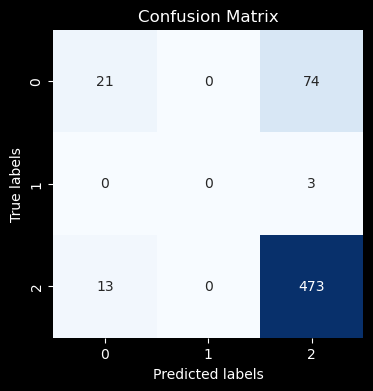

In [193]:
from sklearn.metrics import confusion_matrix # Importing confusion matrix

cf = confusion_matrix(y_test,y_pred) # Create a confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False) 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Add predicted levels to the main dataset

In [194]:
# Preprocess the data
X_new = data['name']

tfidf = TfidfVectorizer()
tfidf.fit(X)  # Fit the TF-IDF vectorizer
X_new_tfidf = tfidf.transform(X_new)

# Predict difficulty levels
predicted_levels = model.predict(X_new_tfidf)

# Add predicted levels to the new dataset
data['Predicted_Level'] = predicted_levels

data


,bodyPart,equipment,gifUrl,name,target,secondaryMuscles,instructions,Predicted_Level
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...,Intermediate
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...,Intermediate
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...,Intermediate
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...,Intermediate
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...,Intermediate
...,...,...,...,...,...,...,...,...
1319,chest,body weight,https://v2.exercisedb.io/image/XQn4pU9HRquS2b,wide-grip chest dip on high parallel bars,pectorals,"triceps, shoulders",Position yourself on the parallel bars with yo...,Intermediate
1320,waist,body weight,https://v2.exercisedb.io/image/ZLPKUAaiObH-2X,wind sprints,abs,"quadriceps, hamstrings, calves",Find an open space or a track to perform the e...,Intermediate
1321,upper legs,body weight,https://v2.exercisedb.io/image/3A5fPe5oCr2EwN,world greatest stretch,hamstrings,"glutes, quadriceps, calves",Start in a lunge position with your right foot...,Intermediate
1322,lower arms,body weight,https://v2.exercisedb.io/image/o8lN2wxaJZIzlF,wrist circles,forearms,"hands, wrists",Extend your arms straight out in front of you....,Beginner


### Train random forrest classifier model to classify exercises

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Preprocess the data
data = pd.get_dummies(data, columns=['bodyPart', 'equipment', 'target']) # One-hot encoding

# Split the data into features and target
X = data.drop(columns=['name', 'secondaryMuscles', 'Predicted_Level', 'gifUrl', 'instructions'])
y = data[['name', 'secondaryMuscles', 'Predicted_Level', 'gifUrl', 'instructions']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model to a pickle file
with open("exercise_model.pkl", "wb") as f:
    pickle.dump((model), f)

### Loading pickle file and classify exersice using user inputs

In [196]:
# Load the model from the pickle file
with open("exercise_model.pkl", "rb") as f:
    model = pickle.load(f)

# User inputs
print("Please provide the following information:")
body_part = input("Body Part: ")
equipment = input("Equipment: ")
target = input("Target: ")

# Create user inputs dictionary
user_inputs = {
    f'bodyPart_{body_part}': 1,
    f'equipment_{equipment}': 1,
    f'target_{target}': 1
}

# Create DataFrame from user inputs
input_df = pd.DataFrame([user_inputs])

# Get the column names used during training
training_columns = model.feature_names_in_.tolist()

# Reindexing to ensure all required columns are present
input_df = input_df.reindex(columns=training_columns, fill_value=0)

# Make predictions
predictions = model.predict(input_df)

# Output the predictions
print("\nExercise Details:")
print("Name:", predictions[0][0])
print("Secondary Muscles:", predictions[0][1])
print("Predicted Level:", predictions[0][2])
print("GIF URL:", predictions[0][3])
print("Instructions:", predictions[0][4])


Please provide the following information:

Exercise Details:
Name: 45° side bend
Secondary Muscles: hip flexors
Predicted Level: Intermediate
GIF URL: https://v2.exercisedb.io/image/PERWLDGUxVbpHS
Instructions: Lie flat on your back with your knees bent and feet flat on the ground. Place your hands behind your head with your elbows pointing outwards. Engaging your abs, slowly lift your upper body off the ground, curling forward until your torso is at a 45-degree angle. Pause for a moment at the top, then slowly lower your upper body back down to the starting position. Repeat for the desired number of repetitions.
